#CA03 – Decision Tree Algorithm
###Name: Karina Ramirez

This dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of our dataset: 

*   Number of target classes:2 ('>50K' and '<=50K') [ Labels: 1, 0 ]
*   Number of attributes (Columns):7
*   Number of instances (Rows):48,842



##2. Data Quality Analysis

In [80]:
# import packages
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

In [81]:
# read csv
data = pd.read_csv('census_data.csv')

In [82]:
# descriptions
data.describe 

# non-null values in each column 
data.count()

# nulls in each row 
data.isnull().sum()

# range, column, number of non-null objects of each column, datatype and memory usage 
data.info()

# show head & tail
data.tail()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

##Data Cleaning

In [83]:
# import package to encode categories
from sklearn.preprocessing import LabelEncoder

In [84]:
# encoding inputs
le_hours_per_week_bin = LabelEncoder()
le_occupation_bin = LabelEncoder()
le_msr_bin = LabelEncoder()
le_capital_gl_bin = LabelEncoder()
le_race_sex_bin = LabelEncoder()
le_education_num_bin = LabelEncoder()
le_education_bin = LabelEncoder()
le_workclass_bin = LabelEncoder()
le_age_bin = LabelEncoder()

In [85]:
# creating an extra column for the label encoded inputs
data['hours_per_week_bin_n'] = le_hours_per_week_bin.fit_transform(data['hours_per_week_bin'])
data['occupation_bin_n'] = le_occupation_bin.fit_transform(data['occupation_bin'])
data['msr_bin_n'] = le_msr_bin.fit_transform(data['msr_bin'])
data['capital_gl_bin_n'] = le_capital_gl_bin.fit_transform(data['capital_gl_bin'])
data['race_sex_bin_n'] = le_race_sex_bin.fit_transform(data['race_sex_bin'])
data['education_num_bin_n'] = le_education_num_bin.fit_transform(data['education_num_bin'])
data['education_bin_n'] = le_education_bin.fit_transform(data['education_bin'])
data['workclass_bin_n'] = le_workclass_bin.fit_transform(data['workclass_bin'])
data['age_bin_n'] = le_age_bin.fit_transform(data['age_bin'])
data.head()

hours_per_week_bin occupation_bin  ... workclass_bin_n age_bin_n
0           b. 31-40   b. Mid - Low  ...               1         3
1            a. 0-30        e. High  ...               1         4
2           b. 31-40         a. Low  ...               1         3
3           b. 31-40         a. Low  ...               1         4
4           b. 31-40        e. High  ...               1         1

[5 rows x 20 columns]

In [86]:
# create new dataframe with just the label encoded columns 
inputs_n = data.drop(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 
                        'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin',
                        'workclass_bin', 'age_bin'], axis = 'columns')
inputs_n.head()

flag  y  hours_per_week_bin_n  ...  education_bin_n  workclass_bin_n  age_bin_n
0  train  0                     1  ...                2                1          3
1  train  0                     0  ...                2                1          4
2  train  0                     1  ...                1                1          3
3  train  0                     1  ...                0                1          4
4  train  0                     1  ...                2                1          1

[5 rows x 11 columns]

##3. Exploratory Data Analysis

No handles with labels found to put in legend.


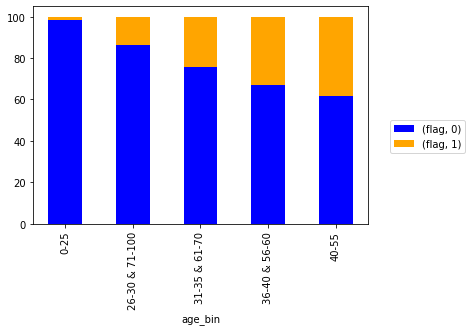

In [87]:
# creating age bar graph 

# slicing data for columns needed
agebintable = inputs_n.loc[:,['y','age_bin_n']]

# defining less than and more than 50k dataframes when grouping by 
less_than_50k = agebintable[agebintable['y'] == 0].groupby(agebintable.age_bin_n).count()
more_than_50k = agebintable[agebintable['y'] == 1].groupby(agebintable.age_bin_n).count()

# slicing again to remove the extra column
less_than_50k = less_than_50k.iloc[:,:-1]
more_than_50k = more_than_50k.iloc[:,:-1]

# merging the 2 tables together
agebintotal = pd.merge(less_than_50k, more_than_50k, on = 'age_bin_n')

# calculating frequencies
frequency_agebin = agebintotal.apply(lambda x: x * 100/sum(x), axis=1)

# creating bar graph  
plt.bar(frequency_agebin.index, frequency_agebin.y_x, width = 0.5, color = 'blue')
plt.bar(frequency_agebin.index, frequency_agebin.y_y, width = 0.5, color = 'orange', 
        bottom = frequency_agebin.y_x)

# labeling the graph 
plt.xlabel('age_bin')
plt.xticks([0, 1, 2, 3, 4], ['0-25', '26-30 & 71-100', 
                             '31-35 & 61-70', 
                             '36-40 & 56-60', '40-55'], 
           rotation = 90)

# adding legend
plt.legend(loc = 'upper left')
plt.legend(['(flag, 0)', '(flag, 1)'], bbox_to_anchor = (1.05, .5))

plt.show()

No handles with labels found to put in legend.


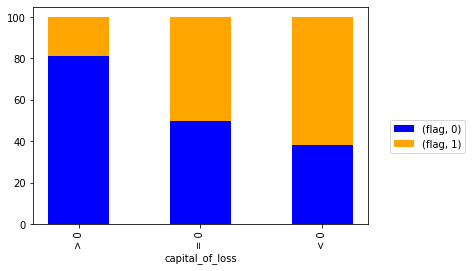

In [88]:
# creating capital bar graph 

# slicing data for columns needed
capitaltable = inputs_n.loc[:,['y','capital_gl_bin_n']]

# defining less than and more than 50k dataframes when grouping by 
less_than_50k_c = capitaltable[capitaltable['y'] == 0].groupby(capitaltable.capital_gl_bin_n).count()
more_than_50k_c = capitaltable[capitaltable['y'] == 1].groupby(capitaltable.capital_gl_bin_n).count()

# slicing again to remove the extra column
less_than_50k_c = less_than_50k_c.iloc[:,:-1]
more_than_50k_c = more_than_50k_c.iloc[:,:-1]

# merging the 2 tables together
capitaltotal = pd.merge(less_than_50k_c, more_than_50k_c, on = 'capital_gl_bin_n')

# calculating frequencies
frequency_capital = capitaltotal.apply(lambda x: x * 100/sum(x), axis=1)

# creating bar graph  
plt.bar(frequency_capital.index, frequency_capital.y_x, width = 0.5, color = 'blue')
plt.bar(frequency_capital.index, frequency_capital.y_y, width = 0.5, color = 'orange', 
        bottom = frequency_capital.y_x)

# labeling the graph 
plt.xlabel('capital_of_loss')
plt.xticks([0, 1, 2], ['> 0', '= 0', '< 0'], rotation = 90)

# adding legend
plt.legend(loc = 'upper left')
plt.legend(['(flag, 0)', '(flag, 1)'], bbox_to_anchor = (1.05, .5))

plt.show()

No handles with labels found to put in legend.


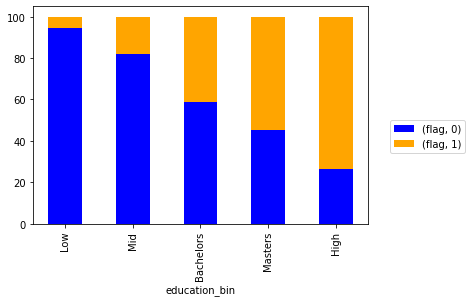

In [89]:
# creating education bar graph 

# slicing data for columns needed
educationtable = inputs_n.loc[:,['y','education_bin_n']]

# defining less than and more than 50k dataframes when grouping by 
less_than_50k_e = educationtable[educationtable['y'] == 0].groupby(educationtable.education_bin_n).count()
more_than_50k_e = educationtable[educationtable['y'] == 1].groupby(educationtable.education_bin_n).count()

# slicing again to remove the extra column
less_than_50k_e = less_than_50k_e.iloc[:,:-1]
more_than_50k_e = more_than_50k_e.iloc[:,:-1]

# merging the 2 tables together
educationtotal = pd.merge(less_than_50k_e, more_than_50k_e, on = 'education_bin_n')

# calculating frequencies
frequency_education = educationtotal.apply(lambda x: x * 100/sum(x), axis=1)

# creating bar graph  
plt.bar(frequency_education.index, frequency_education.y_x, width = 0.5, color = 'blue')
plt.bar(frequency_education.index, frequency_education.y_y, width = 0.5, color = 'orange', 
        bottom = frequency_education.y_x)

# labeling the graph 
plt.xlabel('education_bin')
plt.xticks([0, 1, 2, 3, 4], ['Low', 'Mid', 'Bachelors', 'Masters', 'High'], rotation = 90)

# adding legend
plt.legend(loc = 'upper left')
plt.legend(['(flag, 0)', '(flag, 1)'], bbox_to_anchor = (1.05, .5))

plt.show()

No handles with labels found to put in legend.


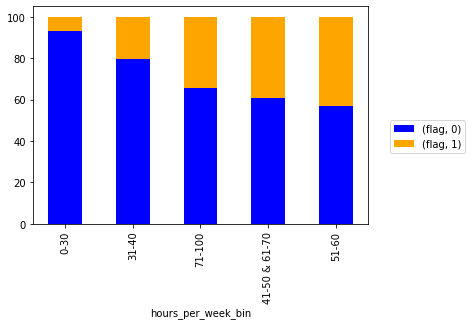

In [135]:
# creating hours per week bar graph 

# slicing data for columns needed
hourstable = inputs_n.loc[:,['y','hours_per_week_bin_n']]

# defining less than and more than 50k dataframes when grouping by 
less_than_50k_h = hourstable[hourstable['y'] == 0].groupby(hourstable.hours_per_week_bin_n).count()
more_than_50k_h = hourstable[hourstable['y'] == 1].groupby(hourstable.hours_per_week_bin_n).count()

# slicing again to remove the extra column
less_than_50k_h = less_than_50k_h.iloc[:,:-1]
more_than_50k_h = more_than_50k_h.iloc[:,:-1]

# merging the 2 tables together
hourstotal = pd.merge(less_than_50k_h, more_than_50k_h, on = 'hours_per_week_bin_n')

# calculating frequencies
frequency_hours = hourstotal.apply(lambda x: x * 100/sum(x), axis=1)

# creating bar graph  
plt.bar(frequency_hours.index, frequency_hours.y_x, width = 0.5, color = 'blue')
plt.bar(frequency_hours.index, frequency_hours.y_y, width = 0.5, color = 'orange', 
        bottom = frequency_hours.y_x)

# labeling the graph 
plt.xlabel('hours_per_week_bin')
plt.xticks([0, 1, 2, 3, 4], ['0-30', '31-40', '71-100', '41-50 & 61-70', '51-60'], rotation = 90)

# adding legend
plt.legend(loc = 'upper left')
plt.legend(['(flag, 0)', '(flag, 1)'], bbox_to_anchor = (1.05, .5))

plt.show()

No handles with labels found to put in legend.


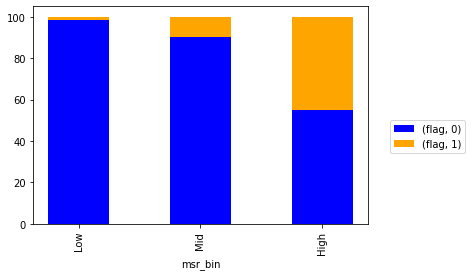

In [91]:
# creating msr bar graph 

# slicing data for columns needed
msrtable = inputs_n.loc[:,['y','msr_bin_n']]

# defining less than and more than 50k dataframes when grouping by 
less_than_50k_m = msrtable[msrtable['y'] == 0].groupby(msrtable.msr_bin_n).count()
more_than_50k_m = msrtable[msrtable['y'] == 1].groupby(msrtable.msr_bin_n).count()

# slicing again to remove the extra column
less_than_50k_m = less_than_50k_m.iloc[:,:-1]
more_than_50k_m = more_than_50k_m.iloc[:,:-1]

# merging the 2 tables together
msrtotal = pd.merge(less_than_50k_m, more_than_50k_m, on = 'msr_bin_n')

# calculating frequencies
frequency_msr = msrtotal.apply(lambda x: x * 100/sum(x), axis=1)

# creating bar graph  
plt.bar(frequency_msr.index, frequency_msr.y_x, width = 0.5, color = 'blue')
plt.bar(frequency_msr.index, frequency_msr.y_y, width = 0.5, color = 'orange', 
        bottom = frequency_msr.y_x)

# labeling the graph 
plt.xlabel('msr_bin')
plt.xticks([0, 1, 2], ['Low', 'Mid', 'High'], rotation = 90)

# adding legend
plt.legend(loc = 'upper left')
plt.legend(['(flag, 0)', '(flag, 1)'], bbox_to_anchor = (1.05, .5))

plt.show()

No handles with labels found to put in legend.


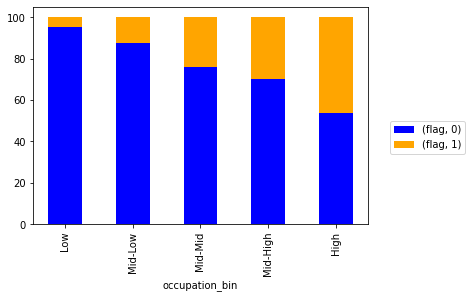

In [92]:
# creating occupation bar graph 

# slicing data for columns needed
occupationtable = inputs_n.loc[:,['y','occupation_bin_n']]

# defining less than and more than 50k dataframes when grouping by 
less_than_50k_o = occupationtable[occupationtable['y'] == 0].groupby(occupationtable.occupation_bin_n).count()
more_than_50k_o = occupationtable[occupationtable['y'] == 1].groupby(occupationtable.occupation_bin_n).count()

# slicing again to remove the extra column
less_than_50k_o = less_than_50k_o.iloc[:,:-1]
more_than_50k_o = more_than_50k_o.iloc[:,:-1]

# merging the 2 tables together
occupationtotal = pd.merge(less_than_50k_o, more_than_50k_o, on = 'occupation_bin_n')

# calculating frequencies
frequency_occupation = occupationtotal.apply(lambda x: x * 100/sum(x), axis=1)

# creating bar graph  
plt.bar(frequency_occupation.index, frequency_occupation.y_x, width = 0.5, color = 'blue')
plt.bar(frequency_occupation.index, frequency_occupation.y_y, width = 0.5, color = 'orange', 
        bottom = frequency_occupation.y_x)

# labeling the graph 
plt.xlabel('occupation_bin')
plt.xticks([0, 1, 2, 3, 4], ['Low', 'Mid-Low', 'Mid-Mid', 'Mid-High', 'High'], rotation = 90)

# adding legend
plt.legend(loc = 'upper left')
plt.legend(['(flag, 0)', '(flag, 1)'], bbox_to_anchor = (1.05, .5))

plt.show()

No handles with labels found to put in legend.


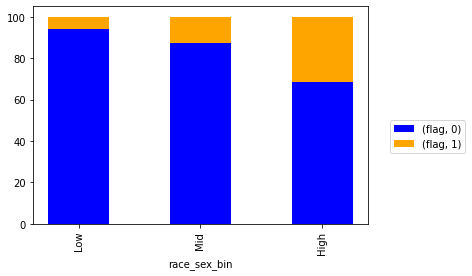

In [93]:
# creating race & sex bar graph 

# slicing data for columns needed
racesextable = inputs_n.loc[:,['y','race_sex_bin_n']]

# defining less than and more than 50k dataframes when grouping by 
less_than_50k_r = racesextable[racesextable['y'] == 0].groupby(racesextable.race_sex_bin_n).count()
more_than_50k_r = racesextable[racesextable['y'] == 1].groupby(racesextable.race_sex_bin_n).count()

# slicing again to remove the extra column
less_than_50k_r = less_than_50k_r.iloc[:,:-1]
more_than_50k_r = more_than_50k_r.iloc[:,:-1]

# merging the 2 tables together
racesextotal = pd.merge(less_than_50k_r, more_than_50k_r, on = 'race_sex_bin_n')

# calculating frequencies
frequency_racesex = racesextotal.apply(lambda x: x * 100/sum(x), axis=1)

# creating bar graph  
plt.bar(frequency_racesex.index, frequency_racesex.y_x, width = 0.5, color = 'blue')
plt.bar(frequency_racesex.index, frequency_racesex.y_y, width = 0.5, color = 'orange', 
        bottom = frequency_racesex.y_x)

# labeling the graph 
plt.xlabel('race_sex_bin')
plt.xticks([0, 1, 2], ['Low', 'Mid', 'High'], rotation = 90)

# adding legend
plt.legend(loc = 'upper left')
plt.legend(['(flag, 0)', '(flag, 1)'], bbox_to_anchor = (1.05, .5))

plt.show()

##4. Build Decision Tree Classifer Models

In [94]:
from sklearn.tree import DecisionTreeClassifier
# depth of tree = # of branches, rand state = controlled randomness, max features = giving the decision tree features to classify off of, min = at least 15 samples will be at a given leaf node
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 101, 
                                max_features = None, min_samples_leaf = 15)

# separate data by flag type
testdata = inputs_n[inputs_n.flag == 'test']
traindata = inputs_n[inputs_n.flag == 'train']

# separate the y values into different data frames
y_train = traindata.y
y_test = testdata.y

# drop flag and y to just have the needed data for train and test
x_train = traindata.drop(['flag', 'y'], axis = 'columns')
x_test= testdata.drop(['flag', 'y'], axis = 'columns')

# run dtree fit with x and y train data
dtree.fit(x_train, y_train) 

# predict values with test data
y_pred = dtree.predict(x_test)

##5. Visualize Your Decision Tree Using GraphViz

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.757916 to fit



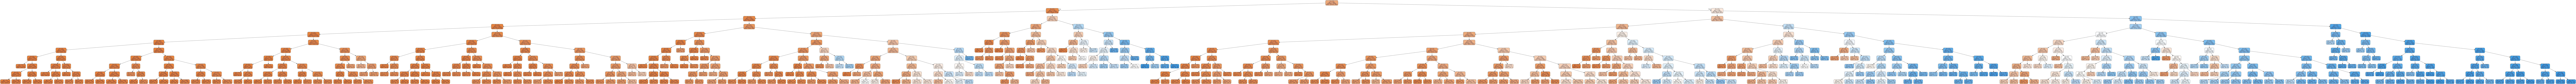

In [95]:
# import packages
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# changing file from string to text to process faster
dot_data = StringIO()

# generate visualization of decision tree
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

##6. Evaluate Tree Performance

Confusion Matrix:
   TN = 11607
   FP = 828
   FN = 1715
   TP = 2131
Accuracy: 0.8438
Precision: 0.7202
Recall Score: 0.5541
F1-Score: 0.8363
ROC AUC Score: 0.7437


Text(0.5, 1.0, 'ROC Curve')

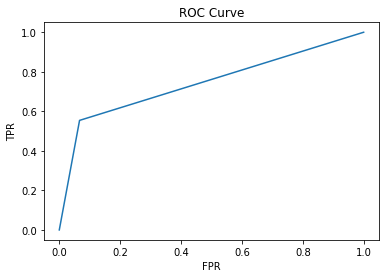

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_curve, roc_auc_score, recall_score

# tests for true negatives, false positives, false negatives and true positives 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels = [0, 1]).ravel()
print('Confusion Matrix:')
print('   TN =', tn)
print('   FP =', fp) 
print('   FN =', fn)
print('   TP =', tp)

# testing accuracy of y_test from y_pred
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy, 4))

# testing precision of y_test from y_pred
precision = precision_score(y_test, y_pred)
print('Precision:', round(precision, 4))

# recall score
recallscore = recall_score(y_test, y_pred)
print('Recall Score:', round(recallscore, 4))

# testing weighted average of precision and recall (takes both false positives and false negatives into account)
f1score = f1_score(y_test, y_pred, labels = [0, 1], average = 'weighted') 
print('F1-Score:', round(f1score, 4))

# calculating roc & auc: looking at the tradeoff between true positives and false positives at different thresholds
rocauc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score:', round(rocauc, 4))

# graphing roc curve 
fpr,tpr, _ = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

##7. Tune Decision Tree Performance

In [97]:
# import packages
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeClassifier

In [120]:
from datetime import datetime
start = datetime.now()

# creating def statement to check scores for different attempts 
def newtreescore(min_samples_split, min_samples_leaf, max_depth, criterion):
  tree = DecisionTreeClassifier(max_depth = max_depth, 
                                min_samples_leaf =  min_samples_leaf,
                                min_samples_split = min_samples_split,
                                criterion = criterion)
  tree.fit(x_train, y_train)
  y_pred = tree.predict(x_test)
  print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 4))
  print('Recall Score:', round(recall_score(y_test, y_pred), 4))
  print('Precision:', round(precision_score(y_test, y_pred), 4))
  print('F1-Score:', round(f1_score(y_test, y_pred, labels=[0, 1], average = 'weighted'), 4))

print(datetime.now()-start)

0:00:00.000338


In [127]:
start = datetime.now()

# original values: max_depth = 10,  min_samples_leaf = 15, min_samples_split = N/A, criterion = N/A

# starting off with entropy criterion 

# attempt #1 at tuning 
print('**Attempt #1**')
newtreescore(500, 500, 10, 'entropy')

# attempt #2 at tuning 
print('**Attempt #2**')
newtreescore(500, 500, 20, 'entropy')

# attempt #3 at tuning 
print('**Attempt #3**')
newtreescore(500, 1000, 10, 'entropy')

# attempt #4 at tuning 
print('**Attempt #4**')
newtreescore(100, 500, 10, 'entropy')

print(datetime.now()-start)

**Attempt #1**
Accuracy Score: 0.8354
Recall Score: 0.6032
Precision: 0.6678
F1-Score: 0.8324
**Attempt #2**
Accuracy Score: 0.8354
Recall Score: 0.6032
Precision: 0.6678
F1-Score: 0.8324
**Attempt #3**
Accuracy Score: 0.8342
Recall Score: 0.5996
Precision: 0.6653
F1-Score: 0.8311
**Attempt #4**
Accuracy Score: 0.8354
Recall Score: 0.6032
Precision: 0.6678
F1-Score: 0.8324
0:00:00.214691


In [122]:
start = datetime.now()

# now trying gini criterion 

# attempt #1 at tuning 
print('**Attempt #1**')
newtreescore(500, 500, 10, 'gini')

# attempt #2 at tuning 
print('**Attempt #2**')
newtreescore(500, 500, 20, 'gini')

# attempt #3 at tuning 
print('**Attempt #3**')
newtreescore(500, 1000, 10, 'gini')

# attempt #4 at tuning 
print('**Attempt #4**')
newtreescore(100, 500, 10, 'gini')

print(datetime.now()-start)

**Attempt #1**
Accuracy Score: 0.8348
Recall Score: 0.5697
Precision: 0.6792
F1-Score: 0.8295
**Attempt #2**
Accuracy Score: 0.8348
Recall Score: 0.5697
Precision: 0.6792
F1-Score: 0.8295
**Attempt #3**
Accuracy Score: 0.8306
Recall Score: 0.52
Precision: 0.6868
F1-Score: 0.822
**Attempt #4**
Accuracy Score: 0.8348
Recall Score: 0.5697
Precision: 0.6792
F1-Score: 0.8295
0:00:00.218672


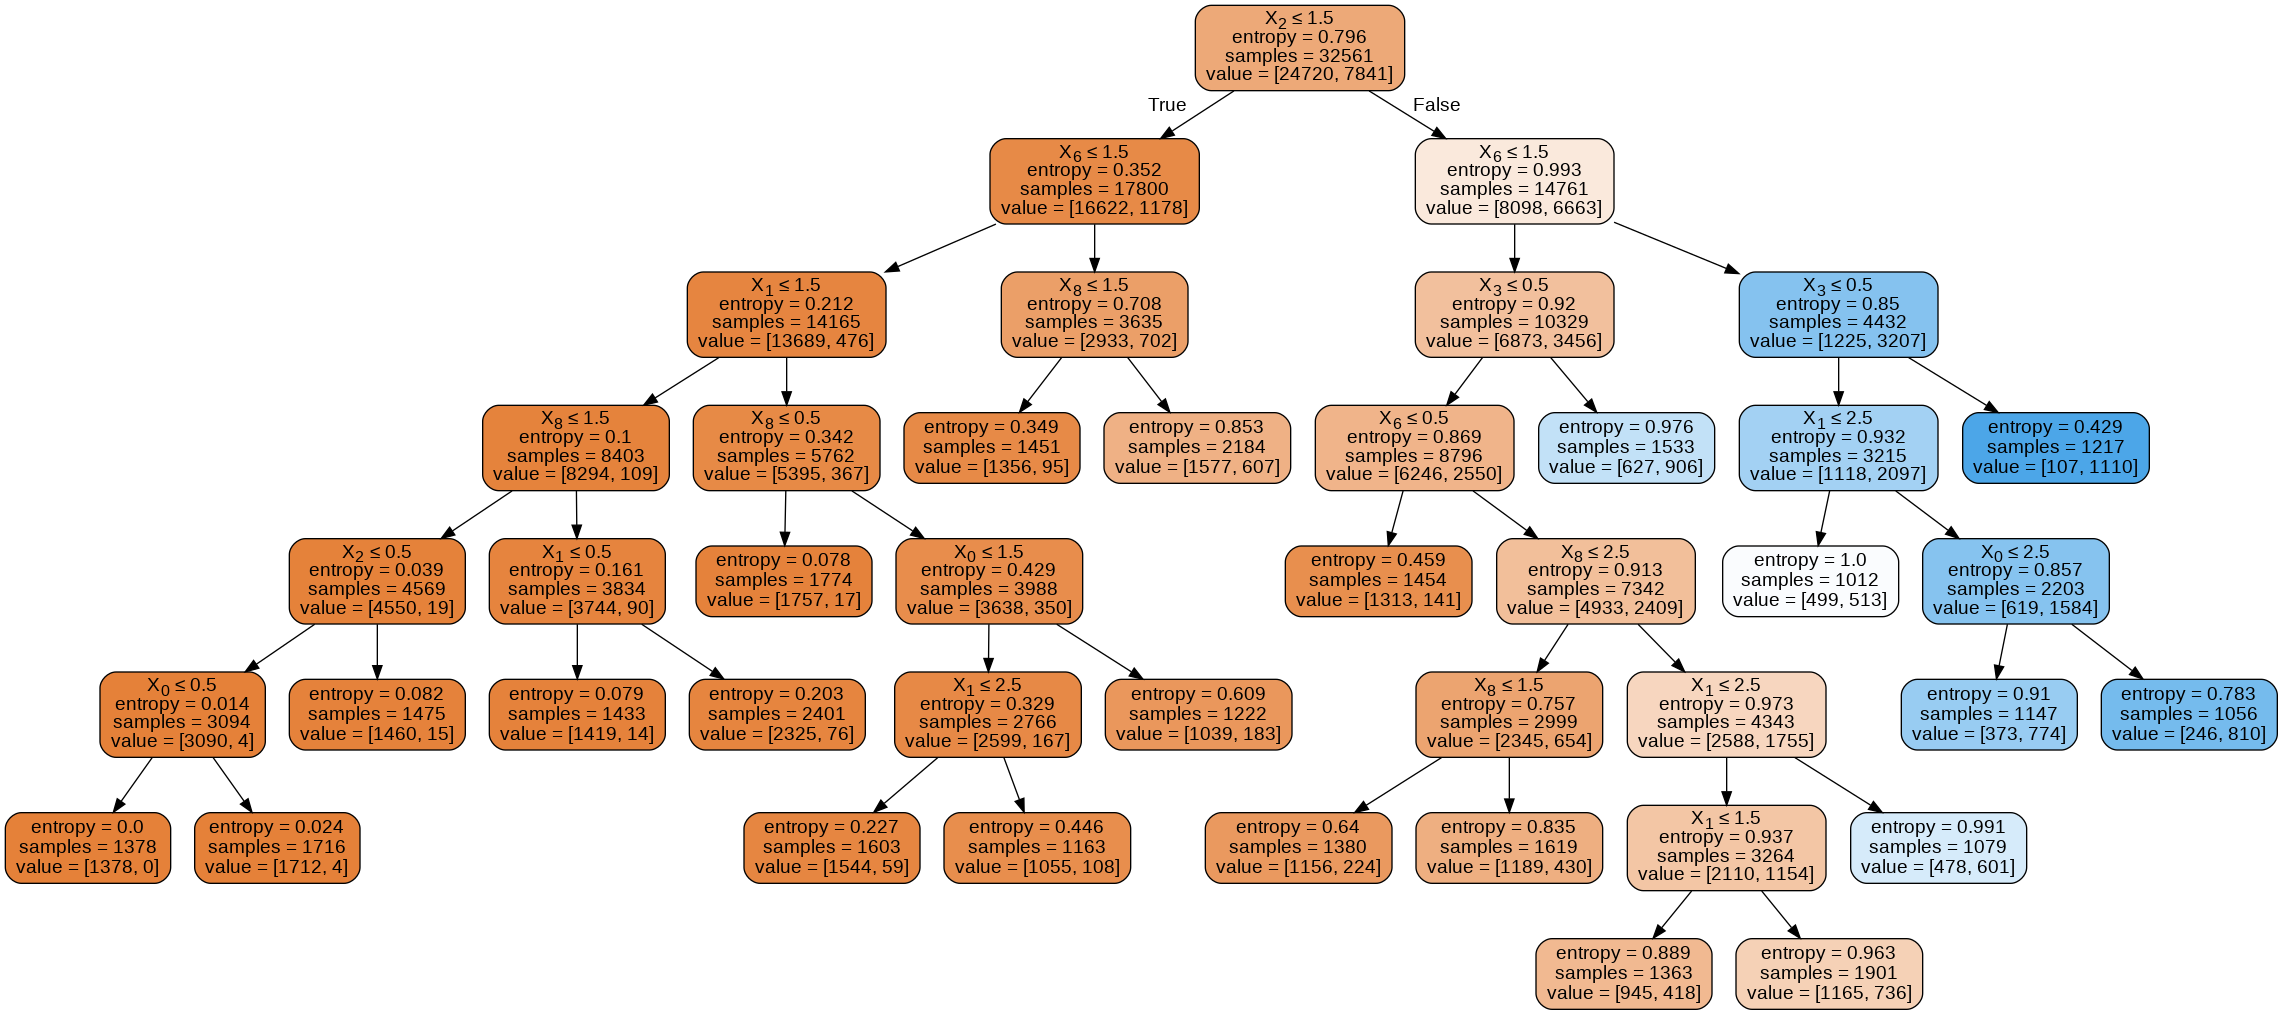

In [138]:
# graphing the best tree
besttree = DecisionTreeClassifier(max_depth = 10, min_samples_leaf =  1000, 
                              min_samples_split = 500, criterion = 'entropy')

besttree.fit(x_train, y_train)
y_pred = besttree.predict(x_test)

# import packages
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# changing file from string to text to process faster
dot_data = StringIO()

# generate visualization of decision tree
export_graphviz(besttree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

##9. Automate Tuning

In [131]:
# create function that creates a dataframe with hyperparameter measures and scoring
def parameters(min_samples_split, min_samples_leaf, max_depth, criterion):
  tree = DecisionTreeClassifier(max_depth = max_depth, 
                                min_samples_leaf =  min_samples_leaf,
                                min_samples_split = min_samples_split,
                                criterion = criterion)
  tree.fit(x_train, y_train)
  y_pred = tree.predict(x_test)
  
  Accuracy = round(accuracy_score(y_test, y_pred), 4)
  Recall = round(recall_score(y_test, y_pred), 4)
  Precision = round(precision_score(y_test, y_pred), 4)
  F1Score = round(f1_score(y_test, y_pred, labels = [0, 1], average = 'weighted'), 4)
  
  df = pd.DataFrame(columns = ['Split Criteria', 'Minimum Sample Split', 
                               'Minimum Sample Leaf', 'Maximum Depth', 'Accuracy',
                               'Recall', 'Precision', 'F1 Score'])
  
  df = df.append({'Split Criteria' : criterion, 'Minimum Sample Split' : min_samples_split, 
                  'Minimum Sample Leaf' : min_samples_leaf, 'Maximum Depth' : max_depth,
                  'Accuracy' : Accuracy, 'Recall' : Recall, 'Precision': Precision, 
                  'F1 Score': F1Score}, ignore_index = True)

  return df

In [136]:
df1 = parameters(500, 500, 10, 'entropy')
df2 = parameters(500, 500, 20, 'entropy')
df3 = parameters(500, 1000, 10, 'entropy')
df4 = parameters(1000, 500, 10, 'entropy')
df5 = parameters(500, 500, 10, 'gini')
df6 = parameters(500, 500, 20, 'gini')
df7 = parameters(500, 1000, 10, 'gini')
df8 = parameters(1000, 500, 10, 'gini')

df= pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
df.reset_index(drop = True, inplace = True)
df

Split Criteria Minimum Sample Split  ... Precision F1 Score
0        entropy                  500  ...    0.6678   0.8324
1        entropy                  500  ...    0.6678   0.8324
2        entropy                  500  ...    0.6653   0.8311
3        entropy                 1000  ...    0.6678   0.8324
4           gini                  500  ...    0.6792   0.8295
5           gini                  500  ...    0.6792   0.8295
6           gini                  500  ...    0.6868   0.8220
7           gini                 1000  ...    0.6792   0.8295

[8 rows x 8 columns]

##10. Predictions using your "trained Decision Tree Model"


*   Hours Worked per Week = 48
*   Occupation Category = Mid - Low
*   Marriage Status & Relationships = High
*   Capital Gain = Yes
*   Race-Sex Group = Mid
*   Number of Years of Education = 12
*   Education Category = High
*   Work Class = Income
*   Age = 58


In [134]:
# make an array with the data for the 1 person
onepersonarray = [3, 1, 2, 2, 1, 1, 4, 1, 3]
onepersonarray = np.array(onepersonarray).reshape(1, -1)
y_pred = besttree.predict(onepersonarray)
y_pred

array([1])

**Conclusion for #10**: The prediction for this person is 1, which means the person may make less than $50,000/year.
